# Include Chirp In Training

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

dir = '/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds/'

# Load Data - Original
train_X1 = np.load(dir + 'train_X.npy')
train_Y = (np.load(dir + 'train_Y.npy')).reshape(-1,2)

train_boa1 = train_Y[:,0].reshape(-1,1)
train_freq1 = train_Y[:,1].reshape(-1,1)

val_X = np.load(dir + 'val_X.npy')
val_Y = (np.load(dir + 'val_Y.npy')).reshape(-1,2)

val_boa1 = val_Y[:,0].reshape(-1,1)
val_freq1 = val_Y[:,1].reshape(-1,1)

train_boa1 = np.concatenate((train_boa1, val_boa1), axis = 0)
train_freq1 = np.concatenate((train_freq1, val_freq1), axis = 0)

# Load Data - Chirp
dir = '/Volumes/KleeFD/dataset/dataset_chirp/02_boa25+30_f0p05f0p5/'
train_X2 = np.load(dir + 'train_X.npy')
train_Y = (np.load(dir + 'train_Y.npy')).reshape(-1,2)

train_boa2 = train_Y[:,0].reshape(-1,1)
train_freq2 = train_Y[:,1].reshape(-1,1)

train_X = np.concatenate((train_X1, val_X,train_X2), axis = 0)

train_boa = np.concatenate((train_boa1, train_boa2), axis = 0)
train_freq = np.concatenate((train_freq1, train_freq2), axis = 0)

Y = np.zeros((len(train_boa), 1), dtype = '<U10')
for i in range(len(train_boa)):
    Y[i] = (str(train_boa[i][0])+', '+ str(train_freq[i][0]))
train_Y = Y

train_Y[0:5]

array([['[30.], [0.'],
       ['[25.], [0.'],
       ['[25.], [0.'],
       ['[30.], [0.'],
       ['[30.], [0.']], dtype='<U10')

In [6]:
Y = np.zeros((len(train_boa), 1), dtype = '<U10')
for i in range(len(train_boa)):
    Y[i] = (str(train_boa[i][0])+', '+ str(train_freq[i][0]))
train_Y = Y

train_Y[0:5]

array([['30.0, 0.5'],
       ['25.0, 0.2'],
       ['25.0, 0.2'],
       ['30.0, 0.35'],
       ['30.0, 0.25']], dtype='<U10')

In [1]:
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [2]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, cbar = False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    if cbar == True:
        plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
model = keras.models.load_model("/Volumes/KleeFD/models/Chirp/train with chirp.h5")

# Prediction for Chirp Signal

In [4]:
dir = "/Volumes/KleeFD/dataset/dataset_chirp/02_boa25+30_f0p05f0p5"

In [5]:
test_X = np.load(dir + '/test_X.npy')
freq = (np.load(dir + '/test_Y.npy'))[:,1]
boa = (np.load(dir + '/test_Y.npy'))[:,0]
continuous_freq = (np.load('/Volumes/KleeFD/dataset/dataset_chirp/01_boa25_f0p05f0p5/FREQ_Chirp_BoA25_f0p05f0p5_L09000.npy'))


boa_cat = np.array([25.0, 30.0])

freq_cat = np.array([0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])

In [6]:
# Get Predictions
pred_proba = model.predict(test_X)

12/12 [==============================] - 1s 36ms/step


In [7]:
pred_proba_boa = pred_proba[1]
pred_proba_freq = pred_proba[0]

# proba -> get highest prba
boa_pred_idx = np.argmax(pred_proba_boa, axis = 1)
freq_pred_idx = np.argmax(pred_proba_freq, axis = 1)

In [8]:
# Change the index to name of category
freq_idx = []
boa_idx = []

for b,f in zip(boa, freq):
    boa_idx.append(np.where(boa_cat == b)[0][0])
    freq_idx.append(np.where(freq_cat == f)[0][0])
    
freq_idx = np.array(freq_idx)
boa_idx = np.array(boa_idx)

### Frequency Results

Confusion matrix, without normalization


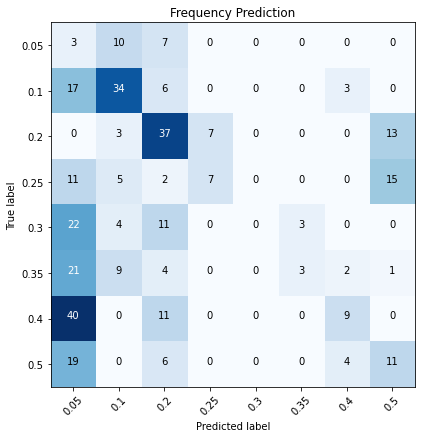

              precision    recall  f1-score   support

           0       0.02      0.15      0.04        20
           1       0.52      0.57      0.54        60
           2       0.44      0.62      0.51        60
           3       0.50      0.17      0.26        40
           4       0.00      0.00      0.00        40
           5       0.50      0.07      0.13        40
           6       0.50      0.15      0.23        60
           7       0.28      0.28      0.28        40

    accuracy                           0.29       360
   macro avg       0.35      0.25      0.25       360
weighted avg       0.39      0.29      0.29       360

ACCURACY : 28.888888888888886


In [9]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(freq_idx, freq_pred_idx)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes = freq_cat, normalize=False,
                      title='Frequency Prediction')
plt.show()

# Classification Report & Accuracy
print(classification_report(freq_idx, freq_pred_idx, zero_division = 0))

a = np.array(freq_idx == freq_pred_idx)

correct = 0

for boolean in a:
    if boolean == True:
        correct += 1
print('='*40)
print("ACCURACY :", correct/len(a)*100)

### BoA Results

Confusion matrix, without normalization


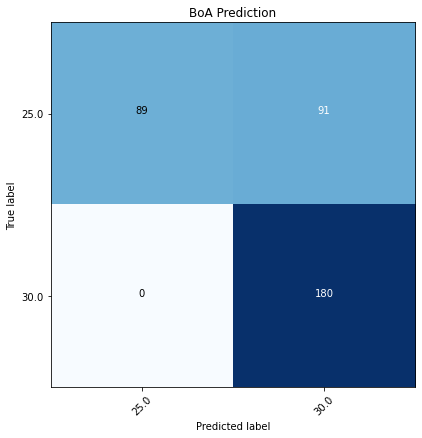

              precision    recall  f1-score   support

           0       1.00      0.49      0.66       180
           1       0.66      1.00      0.80       180

    accuracy                           0.75       360
   macro avg       0.83      0.75      0.73       360
weighted avg       0.83      0.75      0.73       360

ACCURACY : 74.72222222222223


In [10]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(boa_idx, boa_pred_idx)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes = boa_cat, normalize=False,
                      title='BoA Prediction')
plt.show()

# Classification Report & Accuracy
print(classification_report(boa_idx, boa_pred_idx, zero_division = 0))

a = np.array(boa_idx == boa_pred_idx)

correct = 0

for boolean in a:
    if boolean == True:
        correct += 1
print('='*40)
print("ACCURACY :", correct/len(a)*100)

# Prediction for Sinusoidal Signal

In [11]:
dir = "/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds"

In [12]:
test_X = np.load(dir + '/test_X.npy')
freq = (np.load(dir + '/test_Y.npy'))[:,1]
boa = (np.load(dir + '/test_Y.npy'))[:,0]

In [13]:
# Get Predictions
pred_proba = model.predict(test_X)

53/53 [==============================] - 2s 42ms/step


In [14]:
pred_proba_boa = pred_proba[1]
pred_proba_freq = pred_proba[0]

# proba -> get highest prba
boa_pred_idx = np.argmax(pred_proba_boa, axis = 1)
freq_pred_idx = np.argmax(pred_proba_freq, axis = 1)

In [15]:
# Change the index to name of category
freq_idx = []
boa_idx = []

for b,f in zip(boa, freq):
    boa_idx.append(np.where(boa_cat == b)[0][0])
    freq_idx.append(np.where(freq_cat == f)[0][0])
    
freq_idx = np.array(freq_idx)
boa_idx = np.array(boa_idx)

### Frequency Results

Confusion matrix, without normalization


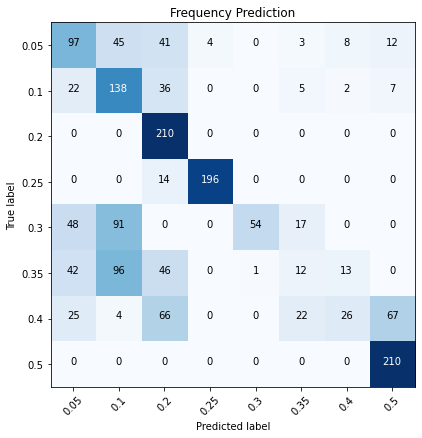

              precision    recall  f1-score   support

           0       0.41      0.46      0.44       210
           1       0.37      0.66      0.47       210
           2       0.51      1.00      0.67       210
           3       0.98      0.93      0.96       210
           4       0.98      0.26      0.41       210
           5       0.20      0.06      0.09       210
           6       0.53      0.12      0.20       210
           7       0.71      1.00      0.83       210

    accuracy                           0.56      1680
   macro avg       0.59      0.56      0.51      1680
weighted avg       0.59      0.56      0.51      1680

ACCURACY : 56.13095238095238


In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(freq_idx, freq_pred_idx)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes = freq_cat, normalize=False,
                      title='Frequency Prediction')
plt.show()

# Classification Report & Accuracy
print(classification_report(freq_idx, freq_pred_idx, zero_division = 0))

a = np.array(freq_idx == freq_pred_idx)

correct = 0

for boolean in a:
    if boolean == True:
        correct += 1
print('='*40)
print("ACCURACY :", correct/len(a)*100)

### BoA Results

Confusion matrix, without normalization


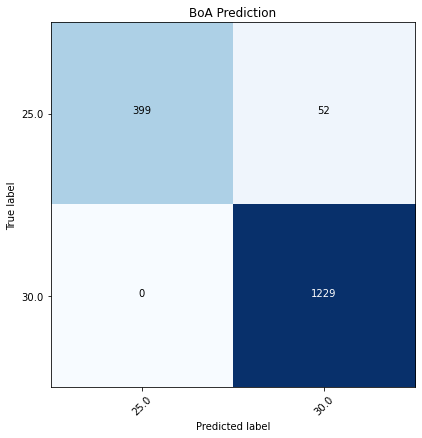

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       451
           1       0.96      1.00      0.98      1229

    accuracy                           0.97      1680
   macro avg       0.98      0.94      0.96      1680
weighted avg       0.97      0.97      0.97      1680

ACCURACY : 96.9047619047619


In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(boa_idx, boa_pred_idx)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes = boa_cat, normalize=False,
                      title='BoA Prediction')
plt.show()

# Classification Report & Accuracy
print(classification_report(boa_idx, boa_pred_idx, zero_division = 0))

a = np.array(boa_idx == boa_pred_idx)

correct = 0

for boolean in a:
    if boolean == True:
        correct += 1
print('='*40)
print("ACCURACY :", correct/len(a)*100)